# 大树先生-泰坦尼克号


参考资料：https://blog.csdn.net/Koala_Tree/article/details/78725881

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 加载数据、预览数据

In [2]:
import pandas as pd

data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 看看幸存与否的分布情况

In [3]:
# 1 表示幸存，0 表示罹难
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

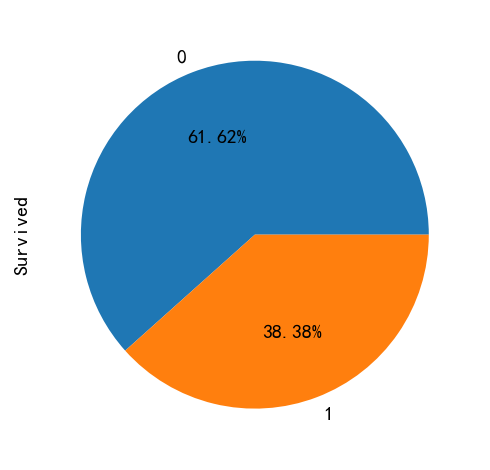

In [4]:
# 使用 Pandas 绘制饼图
data_train['Survived'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

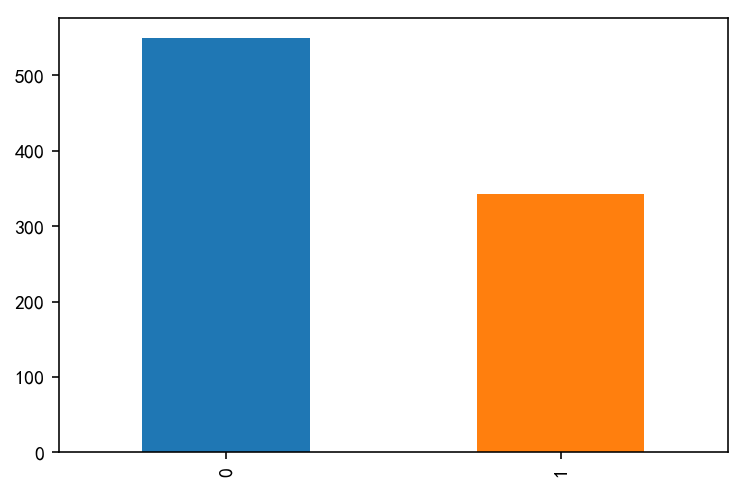

In [5]:
data_train['Survived'].value_counts().plot(kind='bar')
plt.show()

## 缺失值处理

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age、Cabin、Embarked 缺。

神经网络可以处理缺失值，但是有些算法不能处理缺失值。

`train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values`

In [7]:
data_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
data_train.Embarked.mode()

0    S
dtype: object

In [9]:
data_train.Embarked.fillna('S', inplace=True)

In [10]:
data_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# data_train['Embarked'][data_train['Embarked'].isnull()] = 'S'
# data_train.loc[data_train['Embarked'].isnull(), 'Embarked'] = 'S'

In [12]:
data_train['Cabin'].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
E101               3
F2                 3
F33                3
D                  3
E121               2
B22                2
C68                2
D26                2
B18                2
B5                 2
E24                2
C52                2
C78                2
C124               2
C83                2
D17                2
B35                2
F4                 2
C92                2
D20                2
C93                2
F G73              2
B57 B59 B63 B66    2
E25                2
C125               2
E67                2
                  ..
C49                1
C82                1
C106               1
A7                 1
E63                1
B19                1
A20                1
C30                1
C86                1
C128               1
B82 B84            1
C101               1
B4                 1
D56                1
D30                1
B80                1
E50          

In [13]:
# Cabin          204 non-null object
# Cabin 缺失特别多
data_train['Cabin'] = data_train['Cabin'].fillna('U0')

In [14]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 技巧：使用随机森林预测确实的年龄

In [15]:
# 使用这些集合作为训练数据集的特征
age_df = data_train[['Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']]
age_df_notnull = age_df.loc[data_train['Age'].notnull(), :]
age_df_null = age_df.loc[data_train['Age'].isnull(), :]

age_X = age_df_notnull.values[:, 1:]
age_y = age_df_notnull.values[:, 0]

In [16]:
# 使用随机森林预测模型，选取数据集中的数值属性作为特征
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(age_X, age_y)
age_train_predict = rfr.predict(age_df_null.values[:, 1:])
data_train.loc[data_train['Age'].isnull(), 'Age'] = age_train_predict

### 根据类别变量 Pclass 看一看获救人数

In [17]:
data_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
data_train.loc[data_train['Survived'] == 1, ['Pclass', 'Survived']].groupby(
    'Pclass').count()

,Survived
Pclass,
1,136
2,87
3,119


In [19]:
data_train.groupby(['Sex', 'Survived'])['Survived'].count()
data_train.loc[data_train['Survived'] == 0, ['Pclass', 'Survived']].groupby(
    'Pclass').count()
data_train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

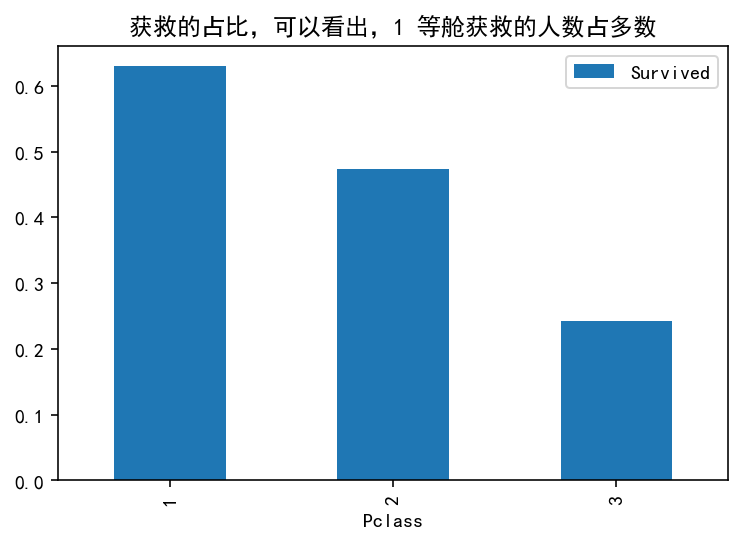

In [21]:
data_train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
plt.title('获救的占比，可以看出，1 等舱获救的人数占多数')
plt.show()

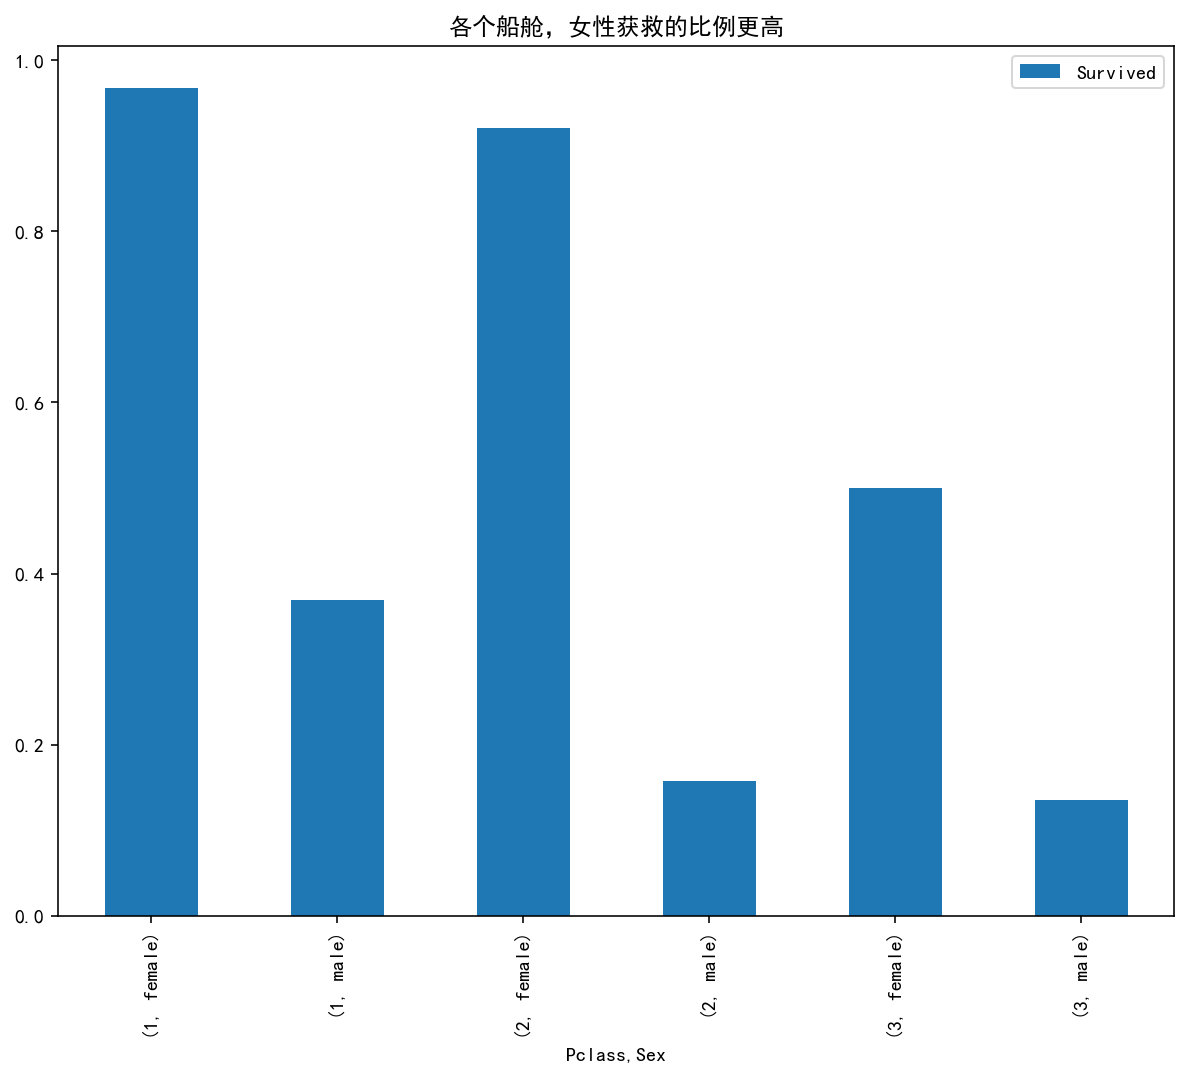

In [22]:
data_train[['Sex', 'Pclass', 'Survived']].groupby(
    ['Pclass', 'Sex']).mean().plot.bar(figsize=(10, 8))
plt.title('各个船舱，女性获救的比例更高')
plt.show()

In [23]:
data_train.groupby(['Pclass', 'Sex', 'Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

### 年龄与存活与否的关系 Age

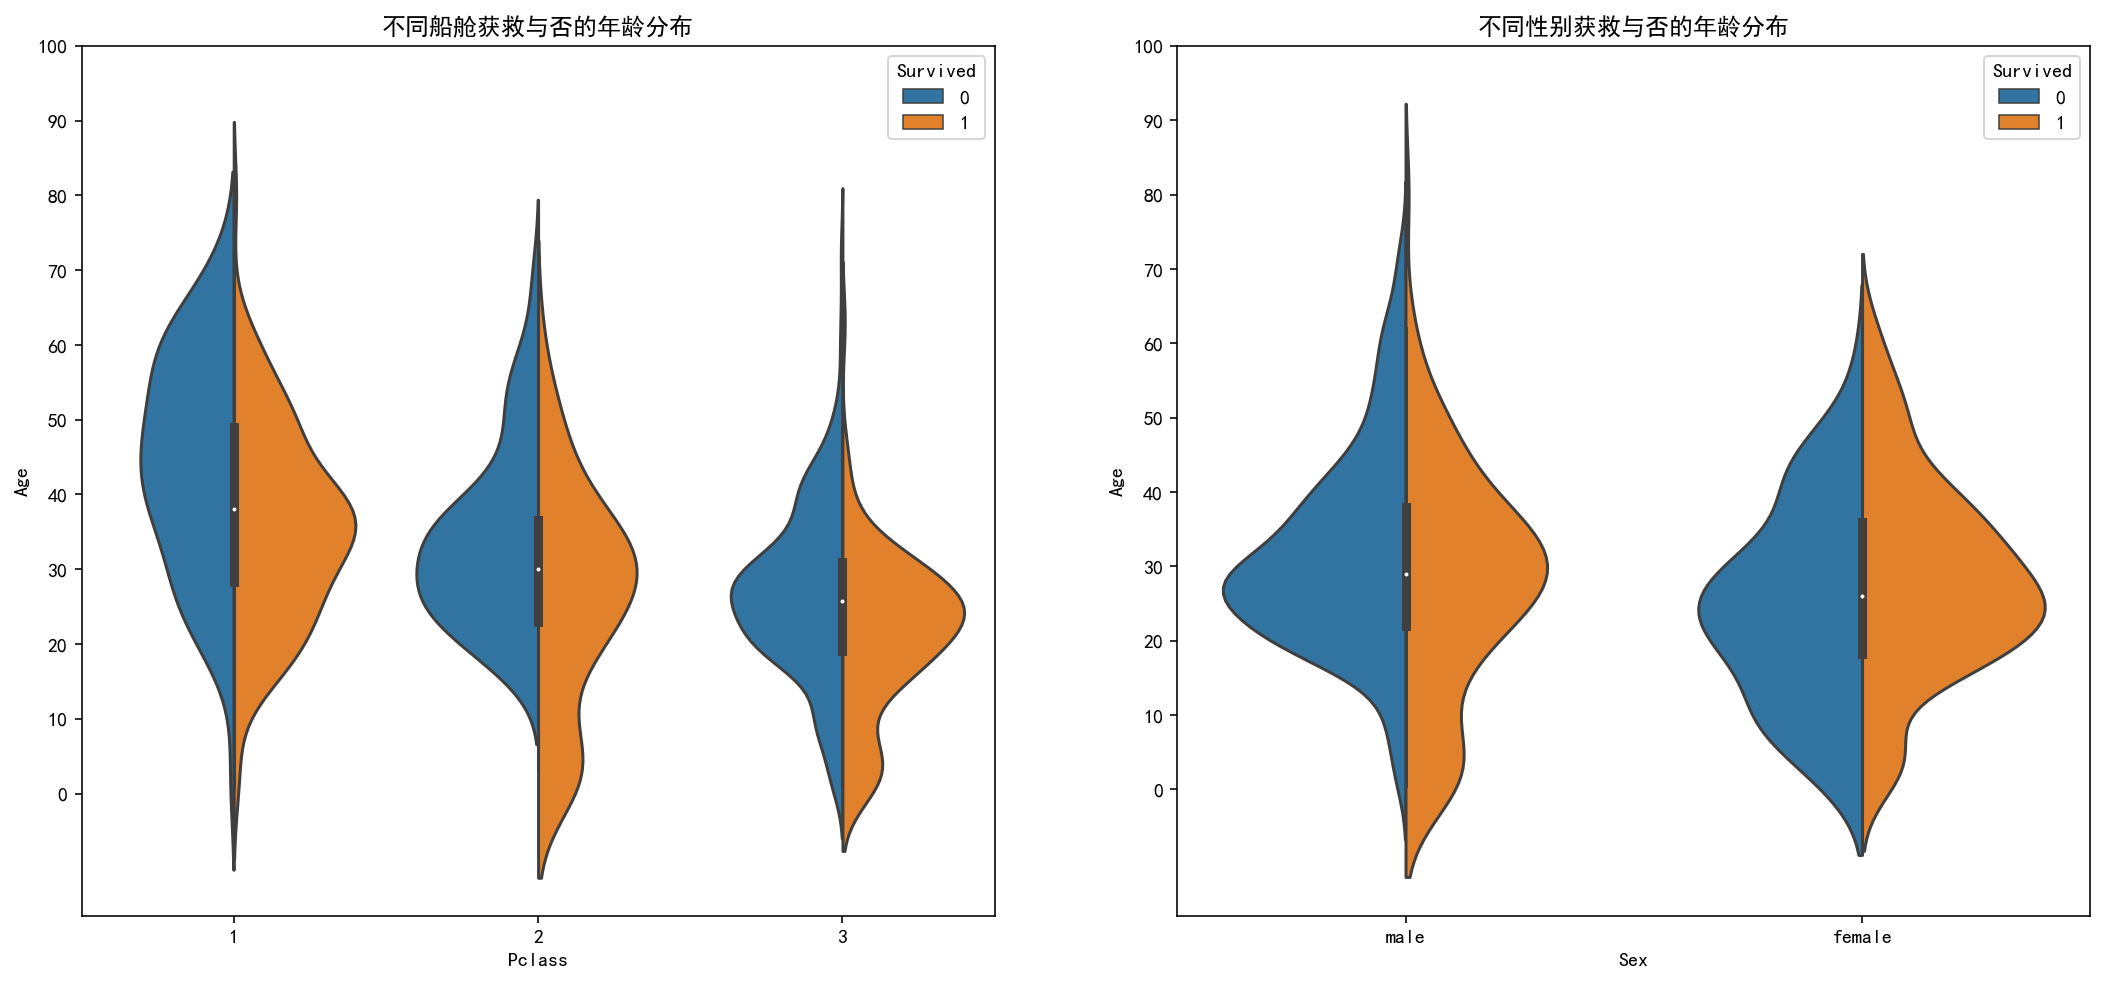

In [24]:
import seaborn as sns

# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
# 小提琴图
sns.violinplot(
    'Pclass', 'Age', hue='Survived', data=data_train, split=True, ax=ax[0])
ax[0].set_title('不同船舱获救与否的年龄分布')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(
    'Sex', 'Age', hue='Survived', data=data_train, split=True, ax=ax[1])
ax[1].set_title('不同性别获救与否的年龄分布')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## 分析总体的年龄分布（只看年龄）

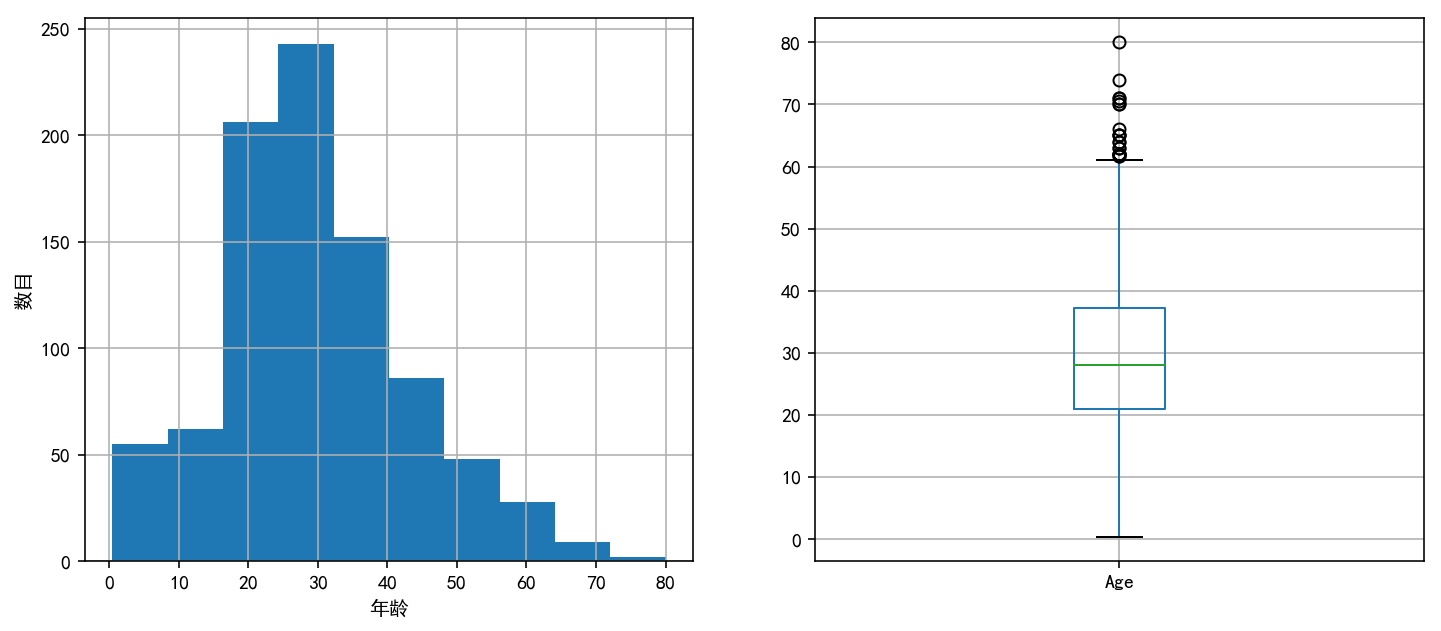

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
data_train['Age'].hist(bins=10)
plt.xlabel('年龄')
plt.ylabel('数目')

plt.subplot(122)
data_train.boxplot('Age', showfliers=True)
plt.show()

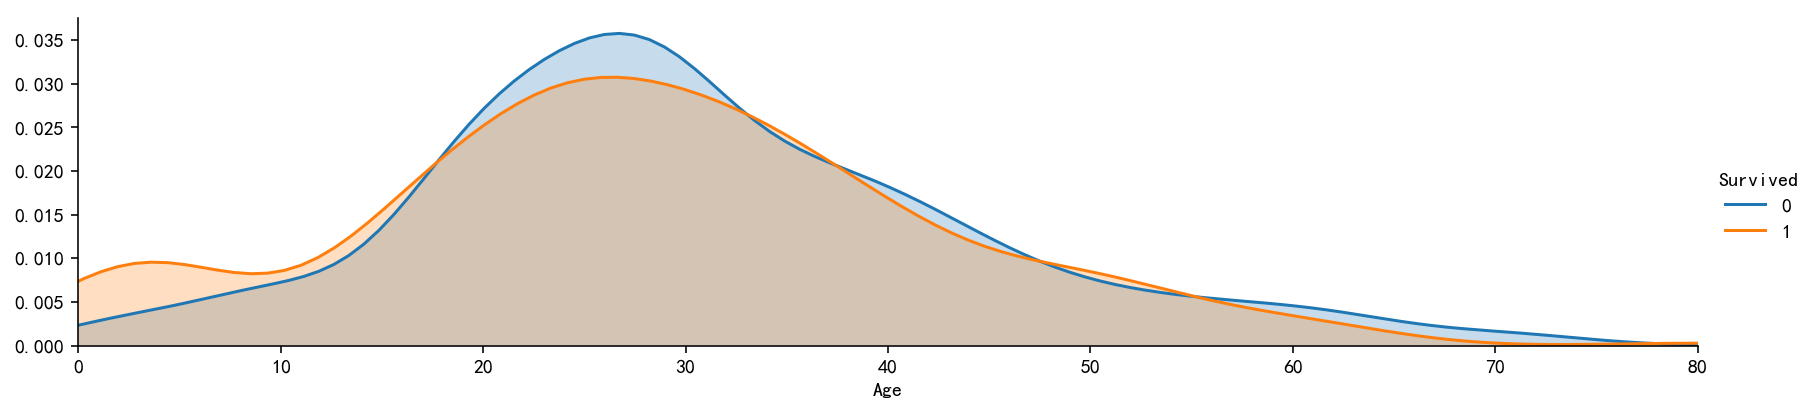

In [26]:
# 画网格
facet = sns.FacetGrid(data_train, hue="Survived", aspect=4)
# 画概率密度曲线
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, data_train['Age'].max()))
facet.add_legend()
plt.show()

按照年龄分组，得到一个比例。

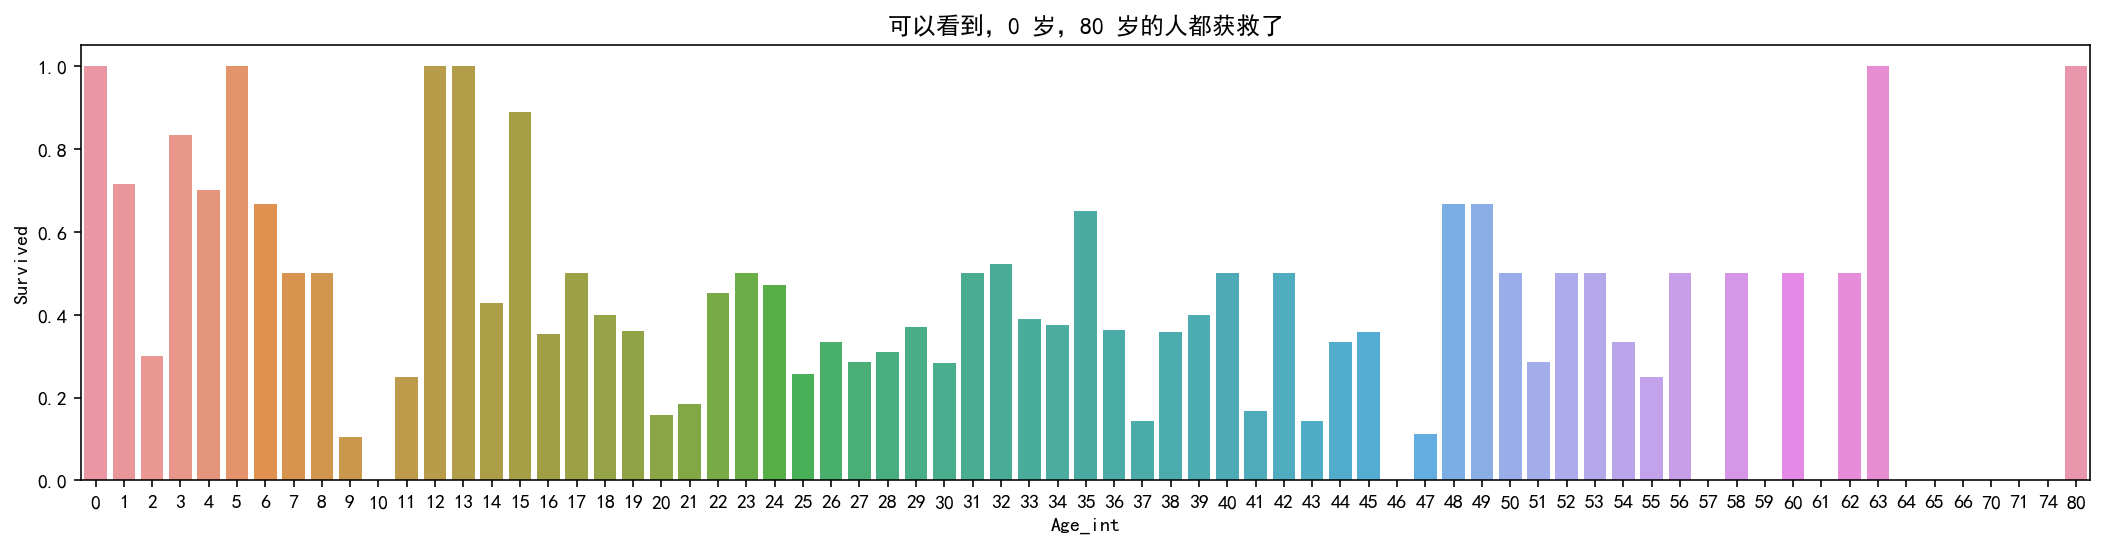

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))
data_train['Age_int'] = data_train['Age'].astype(int)
average_age = data_train[['Age_int', 'Survived']].groupby(
    'Age_int', as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)
plt.title('可以看到，0 岁，80 岁的人都获救了')
plt.show()

In [28]:
average_age = data_train[['Age_int', 'Survived']].groupby(
    'Age_int', as_index=False).mean()
data_train['Age'].describe()

count    891.000000
mean      29.665883
std       13.757414
min        0.420000
25%       21.000000
50%       28.000000
75%       37.278214
max       80.000000
Name: Age, dtype: float64

In [29]:
average_age

,Age_int,Survived
0,0,1.000000
1,1,0.714286
2,2,0.300000
3,3,0.833333
4,4,0.700000
5,5,1.000000
6,6,0.666667
7,7,0.500000
8,8,0.500000
9,9,0.105263


### 年龄分箱操作，认为定义分界线

In [30]:
bins = [0, 12, 18, 65, 100]
data_train['Age_group'] = pd.cut(data_train['Age'], bins)
data_train['Age_group'].head()

0    (18, 65]
1    (18, 65]
2    (18, 65]
3    (18, 65]
4    (18, 65]
Name: Age_group, dtype: category
Categories (4, interval[int64]): [(0, 12] < (12, 18] < (18, 65] < (65, 100]]

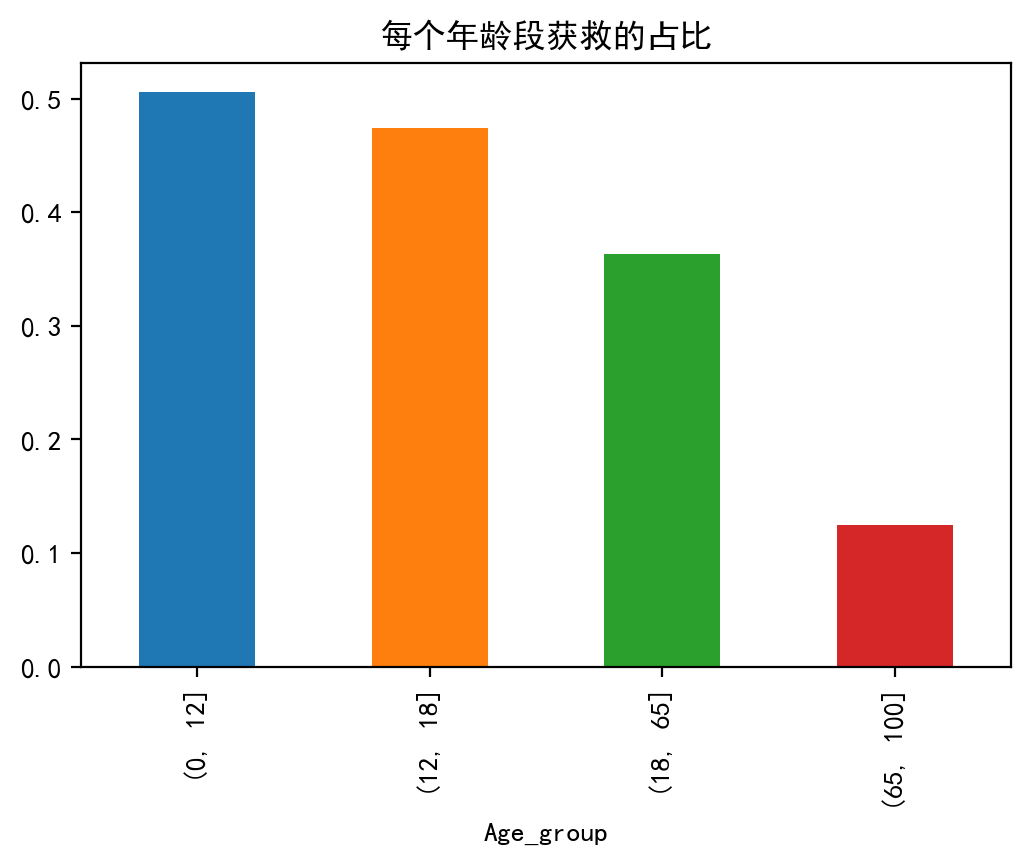

In [31]:
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(6, 4), dpi=100)
data_train.groupby('Age_group')['Survived'].mean().plot.bar()
plt.title('每个年龄段获救的占比')
plt.show()

### 从姓名中提取称呼字段

In [32]:
data_train['Title'] = data_train['Name'].str.extract(
    '([A-Za-z]+)\.', expand=True)

In [33]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S,22,"(18, 65]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,35,"(18, 65]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S,35,"(18, 65]",Mr
5,6,0,3,"Moran, Mr. James",male,21.800000,0,0,330877,8.4583,U0,Q,21,"(18, 65]",Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,54,"(18, 65]",Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S,2,"(0, 12]",Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S,27,"(18, 65]",Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C,14,"(12, 18]",Mrs
